In [1]:
import xarray as xr

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
def recortar(ds, shp):

    ds_para_recorte = recorte.preparar_para_recorte(ds, xdim='lon', ydim='lat')
    ds_recortado = recorte.recorte(ds_para_recorte, shp)

    return ds_recortado

In [4]:
ds = xr.open_dataset('precip.comb.v2018to2016-v6monitorafter.total.nc')

In [5]:
br_madeira = gpd.read_file('shp/brasil_madeira.shp')

In [24]:
clim = climatology(ds, '1981-01-01', '2010-12-01')
clim_br = recortar(clim, br_madeira)

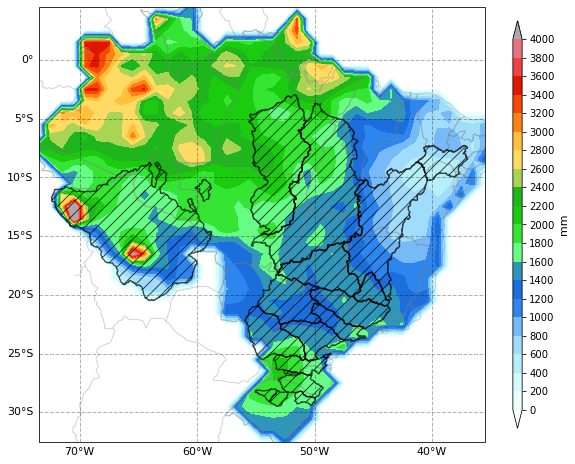

In [25]:
fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw=dict(projection = ccrs.PlateCarree()))

plot.plot(ax, clim_br.precip.sum('month'), levels=range(0,4200,200))

fig.savefig('precip_8110.png', bbox_inches='tight', facecolor='w', edgecolor='w')